In [18]:
import numpy as np
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras.datasets import mnist

## load mnist dataset

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
y_train.shape

(60000,)

In [6]:
x_test.shape

(10000, 28, 28)

In [7]:
y_test.shape

(10000,)

## get number of labels

In [8]:
num_labels = len(np.unique(y_train))
num_labels

10

## convert to one-hot vector

In [9]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [10]:
y_train.shape

(60000, 10)

In [11]:
y_test.shape

(10000, 10)

## input image dimensions

In [12]:
image_size = x_train.shape[1]
image_size

28

## resize and normalize

In [13]:
x_train = np.reshape(x_train,[-1, image_size, image_size, 1])
x_test = np.reshape(x_test,[-1, image_size, image_size, 1])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [14]:
x_train.shape

(60000, 28, 28, 1)

In [15]:
x_test.shape

(10000, 28, 28, 1)

## network parameters

In [16]:
input_shape = (image_size, image_size, 1)
batch_size = 128
kernel_size = 3
pool_size = 2
filters = 64
dropout = 0.2
#dropout = 0.3

## create model

In [19]:
# use functional API to build cnn layers
inputs = Input(shape=input_shape)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(inputs)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(y)
y = MaxPooling2D()(y)
y = Conv2D(filters=filters,
           kernel_size=kernel_size,
           activation='relu')(y)
# image to vector before connecting to dense layer
y = Flatten()(y)
# dropout regularization
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation='softmax')(y)

# build the model by supplying inputs/outputs
model = Model(inputs=inputs, outputs=outputs)
# network model in text
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0     

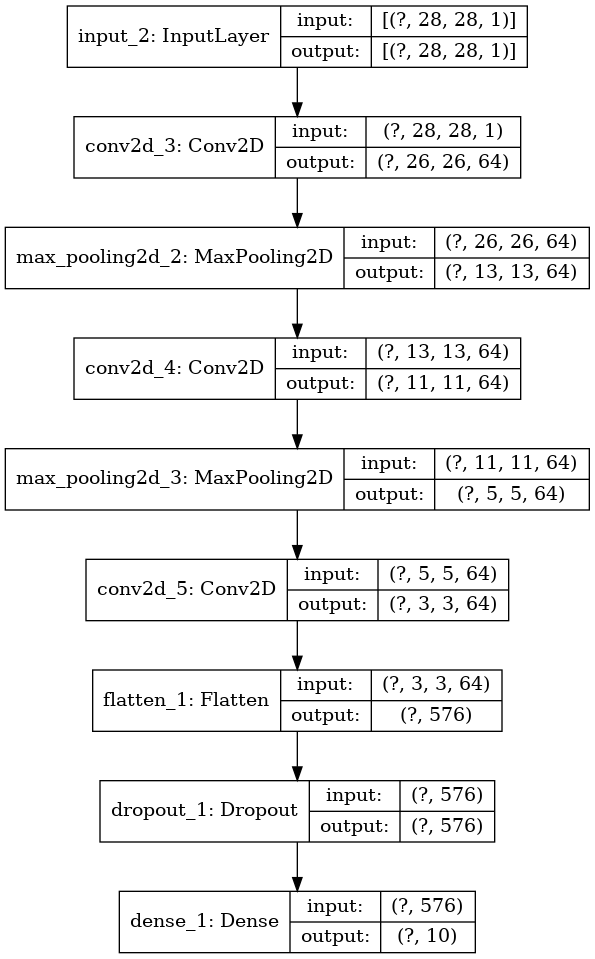

In [20]:
plot_model(model, to_file='cnn-mnist.png', show_shapes=True, show_layer_names=True)
from IPython.display import Image
Image(retina=True, filename='cnn-mnist.png')

## Compile the model

In [21]:
# loss function for one-hot vector
# use of adam optimizer
# accuracy is good metric for classification tasks
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## train

In [27]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0150 - accuracy: 0.9951
Epoch 2/20
60000/60000 [==============================] - 9s 152us/sample - loss: 0.0140 - accuracy: 0.9952
Epoch 3/20
60000/60000 [==============================] - 8s 141us/sample - loss: 0.0123 - accuracy: 0.9961
Epoch 4/20
60000/60000 [==============================] - 7s 115us/sample - loss: 0.0120 - accuracy: 0.9959
Epoch 5/20
60000/60000 [==============================] - 8s 139us/sample - loss: 0.0093 - accuracy: 0.9970
Epoch 6/20
60000/60000 [==============================] - 8s 127us/sample - loss: 0.0102 - accuracy: 0.9965
Epoch 7/20
60000/60000 [==============================] - 10s 161us/sample - loss: 0.0091 - accuracy: 0.9970
Epoch 8/20
60000/60000 [==============================] - 8s 137us/sample - loss: 0.0089 - accuracy: 0.9971
Epoch 9/20
60000/60000 [==============================] - 9s 155us/sample - loss: 0.0075 - accuracy: 0.9975
Epoc

In [28]:
loss, acc = model.evaluate(x_test, y_test, batch_size=batch_size)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================


Test accuracy: 99.3%


In [29]:
import sklearn.metrics as metrics

y_pred_ohe = model.predict(x_test)   
y_pred_labels = np.argmax(y_pred_ohe, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

confusion_matrix = metrics.confusion_matrix(y_true=y_true_labels, y_pred=y_pred_labels)  
confusion_matrix

array([[ 978,    0,    1,    0,    0,    0,    0,    1,    0,    0],
       [   0, 1131,    0,    1,    0,    1,    0,    2,    0,    0],
       [   1,    0, 1023,    1,    0,    0,    0,    7,    0,    0],
       [   0,    0,    1, 1007,    0,    2,    0,    0,    0,    0],
       [   0,    0,    1,    0,  972,    0,    0,    2,    0,    7],
       [   2,    0,    0,    3,    0,  884,    2,    1,    0,    0],
       [   2,    2,    2,    0,    1,    1,  950,    0,    0,    0],
       [   0,    1,    1,    0,    0,    0,    0, 1026,    0,    0],
       [   0,    0,    2,    2,    1,    0,    0,    2,  966,    1],
       [   2,    0,    0,    0,    1,    4,    0,    3,    2,  997]])

In [30]:
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

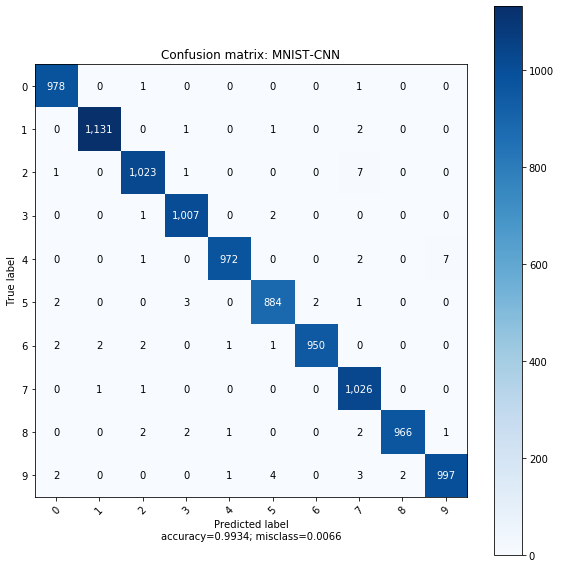

In [31]:
title = 'Confusion matrix: MNIST-CNN'
target_names = [0,1,2,3,4,5,6,7,8,9]
plot_confusion_matrix(confusion_matrix, target_names, title=title, cmap=None, normalize=False)